In [32]:
from set_math import *

In [33]:
from set_visualization import *

# load & merge dataset

In [34]:
sales = pd.read_csv('../../data/basic/train.csv')
key = pd.read_csv('../../data/basic/key.csv')
weather = pd.read_csv('../../data/weather_v8_with_holiday.csv', index_col=0)

In [35]:
print(sales.shape)
sales.head()

(4617600, 4)


,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0
1,2012-01-01,1,2,0
2,2012-01-01,1,3,0
3,2012-01-01,1,4,0
4,2012-01-01,1,5,0


In [36]:
print(key.shape)
key.head()

(45, 2)


,store_nbr,station_nbr
0,1,1
1,2,14
2,3,7
3,4,9
4,5,12


In [37]:
print(weather.shape)
weather.head()

(20517, 27)


,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,sealevel,resultspeed,resultdir,avgspeed,codesum_2,year,monthday,days,dayofweek,is_holiday
0,1,2012-01-01,52.0,31.0,42.0,0.0,36.0,40.0,23.0,0.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
1,1,2012-01-02,50.0,31.0,41.0,0.0,26.0,35.0,24.0,0.0,...,29.62,9.8,24.0,10.3,RA,2012,"['01', '02']",2,Mon,holiday_work
2,1,2012-01-03,32.0,11.0,22.0,0.0,4.0,18.0,43.0,0.0,...,29.87,10.8,31.0,11.6,MO,2012,"['01', '03']",3,Tue,workday
3,1,2012-01-04,28.0,9.0,19.0,0.0,-1.0,14.0,46.0,0.0,...,30.03,6.3,27.0,8.3,MO,2012,"['01', '04']",4,Wed,workday
4,1,2012-01-05,38.0,25.0,32.0,0.0,13.0,25.0,33.0,0.0,...,29.84,6.9,25.0,7.8,MO,2012,"['01', '05']",5,Thi,workday


In [38]:
weather.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'codesum_YN',
       'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed', 'codesum_2', 'year', 'monthday', 'days',
       'dayofweek', 'is_holiday'],
      dtype='object')

In [39]:
sales = pd.merge(sales, key)

In [40]:
df = pd.merge(sales, weather)

In [41]:
print(df.shape)
df.head()

(4617600, 30)


,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sealevel,resultspeed,resultdir,avgspeed,codesum_2,year,monthday,days,dayofweek,is_holiday
0,2012-01-01,1,1,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
1,2012-01-01,1,2,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
2,2012-01-01,1,3,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
3,2012-01-01,1,4,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday
4,2012-01-01,1,5,0,1,52.0,31.0,42.0,0.0,36.0,...,29.92,3.6,20.0,4.6,"FG,RA,BR",2012,"['01', '01']",1,Sun,holiday


In [43]:
df = pd.DataFrame(data=df, columns=['date', 'units', 'store_nbr', 'item_nbr', 'station_nbr', 
                                    'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 
                                    'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'codesum_2', 'codesum_YN', 
                                    'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
                                    'year', 'monthday', 'days', 'dayofweek', 'is_holiday'])

### 판매가 이루어진 데이터로 한정

In [44]:
df = df[df['units'] > 0].reset_index(drop=True)

In [45]:
df.shape

(118696, 30)

### 날짜 데이터 encoding

In [46]:
def make_year(date):
    return int(date.split('-')[0])

def make_month(date):
    return int(date.split('-')[1])

def make_day(date):
    return int(date.split('-')[2])

def make_monthday(date):
    return (date.split('-')[1:3])

def dayofweek_num(dayofweek):
    if dayofweek == 'Mon':
        return 1
    elif dayofweek == 'Tue':
        return 2
    elif dayofweek == 'Wed':
        return 3
    elif dayofweek == 'Thi':
        return 4
    elif dayofweek == 'Fri':
        return 5
    elif dayofweek == 'Sat':
        return 6
    elif dayofweek == 'Sun':
        return 7

In [47]:
df['year'] = df['date'].apply(make_year)
df['month'] = df['date'].apply(make_month)
df['day'] = df['date'].apply(make_day)
df['dayofweek'] = df['dayofweek'].apply(dayofweek_num)
df['dayofweek'] = df['dayofweek'].astype(int)

# OLS 모델 생성 카테고리형 독립변수만 고려

### 분포가 치우쳐져 있는 `units`에 한하여 log를 취하여줌

In [48]:
model_1 = sm.OLS.from_formula('np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day)', data=df)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     3596.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:48:24   Log-Likelihood:            -1.0436e+05
No. Observations:              118696   AIC:                         2.091e+05
Df Residuals:                  118492   BIC:                         2.111e+05
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.1059      0

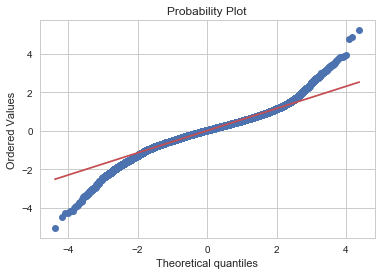

In [49]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

# Leverage & Outlier 제거

In [50]:
df_test = df
df_test.shape

(118696, 32)

In [51]:
influence = result_1.get_influence()
influence

### Cook's Distance (Fox outlier recommendation) 를 통한 leverage, outlier 구하기


In [52]:
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df['units']) - 2)
drop_idx = np.where(cooks_d2 > fox_cr)[0]
print(len(drop_idx))
drop_idx

7542


array([     1,      2,     11, ..., 118553, 118628, 118656])

### 해당 leverage&outlier 제외

In [53]:
df_test.drop(list(drop_idx),inplace=True)

In [54]:
df_test.reset_index(drop=True, inplace=True)

# 쿡스디스턴스를 통한 아웃라이어 제거 후

In [69]:
# model 1 : log(units) , year, month, day
model_1 = sm.OLS.from_formula('np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     5412.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:55:33   Log-Likelihood:                -71965.
No. Observations:              111154   AIC:                         1.443e+05
Df Residuals:                  110950   BIC:                         1.463e+05
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.0659      0

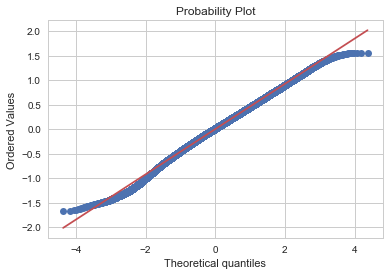

Chi^2       : 682.121
P-value     :  0.000


In [70]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [66]:
# model 2 : log(units)
model_2 = sm.OLS.from_formula('np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek)', data=df_test)
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     6207.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:54:18   Log-Likelihood:                -77053.
No. Observations:              111154   AIC:                         1.544e+05
Df Residuals:                  110993   BIC:                         1.560e+05
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6078      0

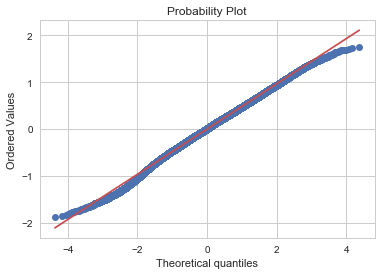

Chi^2       : 644.302
P-value     :  0.000


In [68]:
sp.stats.probplot(result_2.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_2.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [71]:
# model 3: log(x+1)(units), year, month, dat
model_3 = sm.OLS.from_formula('np.log1p(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day)', data=df_test)
result_3 = model_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log1p(units)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     5192.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:56:29   Log-Likelihood:                -59562.
No. Observations:              111154   AIC:                         1.195e+05
Df Residuals:                  110950   BIC:                         1.215e+05
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.4942      0

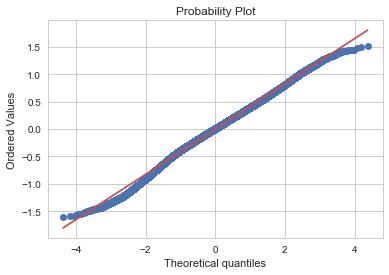

Chi^2       : 1036.959
P-value     :  0.000


In [72]:
sp.stats.probplot(result_3.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_3.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [73]:
# model 4 : log(x+1)
model_4 = sm.OLS.from_formula('np.log1p(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek)', data=df_test)
result_4 = model_4.fit()
print(result_4.summary())

                            OLS Regression Results                            
Dep. Variable:        np.log1p(units)   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     5902.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:57:10   Log-Likelihood:                -65072.
No. Observations:              111154   AIC:                         1.305e+05
Df Residuals:                  110993   BIC:                         1.320e+05
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.0655      0

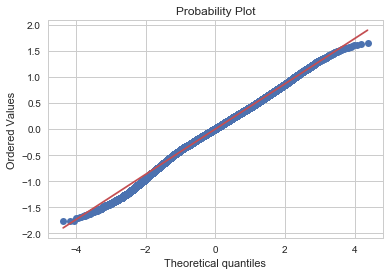

Chi^2       : 1047.879
P-value     :  0.000


In [74]:
sp.stats.probplot(result_4.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_4.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

***여전히 잔차 정규성은 보이지 않음***

# 정규화 (sci-kit learn)

In [61]:
from sklearn.datasets import make_regression
from patsy import dmatrices
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [75]:
# patsy를 통한 formula 생성
y1, X1 = dmatrices( "np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day)", df_test , return_type = 'dataframe' )
y2, X2 = dmatrices( "np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek)", df_test , return_type = 'dataframe' )
y3, X3 = dmatrices( "np.log1p(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek) + C(year) + C(month) + C(day)", df_test , return_type = 'dataframe' )
y4, X4 = dmatrices( "np.log1p(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek)", df_test , return_type = 'dataframe' )

In [77]:
# y1, X1, Linear Regression, Ridge, Lasso, ElasticNet
model1_LR = LinearRegression().fit(X1, y1)
model1_ridge = Ridge(alpha=0.5).fit(X1, y1)
model1_lasso = Lasso(alpha=0.5).fit(X1, y1)
model1_EN = ElasticNet(alpha=0.5).fit(X1, y1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [81]:
from sklearn.model_selection import KFold

cv = KFold(10, shuffle=True)
#cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)
print('[Original LR]')
print('score : ', cross_val_score(model1_LR, X1, y1, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_LR, X1, y1, scoring="r2", cv=cv)),'\n')

print('[Ridge]')
print('score : ', cross_val_score(model1_ridge, X1, y1, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_ridge, X1, y1, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model1_lasso, X1, y1, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_lasso, X1, y1, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model1_EN, X1, y1, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_EN, X1, y1, scoring="r2", cv=cv)),'\n')
#      'std : ', np.std(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)))

[Original LR]
score :  [ 0.9078799   0.90746759  0.90682726  0.91084697  0.90558809  0.91077815
  0.90909257  0.90791862  0.90681913  0.9059427 ] 
 mean :  0.907898790277 

[Ridge]
score :  [ 0.9051048   0.9071781   0.90857981  0.90739187  0.90707112  0.91112592
  0.90639472  0.90905004  0.90908661  0.90830144] 
 mean :  0.907915192394 


[Lasso]
score :  [ -1.50514305e-04  -4.02973823e-05  -1.51003514e-07  -2.23620178e-06
  -6.00416003e-05  -1.47330586e-06  -3.72545855e-04  -1.83818753e-04
  -7.92228453e-06  -3.62678274e-04] 
 mean :  -0.000252371843996 


[Elastic-net]
score :  [ -1.71299793e-04  -9.18818939e-06  -1.35235111e-05  -2.28982840e-05
  -4.07374275e-06  -1.94197481e-05  -8.34451045e-06  -2.67484469e-04
  -1.57160851e-06  -1.88028283e-04] 
 mean :  -5.60225284698e-05 



In [82]:
# y2, X2, Linear Regression, Ridge, Lasso, ElasticNet
model2_LR = LinearRegression().fit(X2, y2)
model2_ridge = Ridge(alpha=0.5).fit(X2, y2)
model2_lasso = Lasso(alpha=0.5).fit(X2, y2)
model2_EN = ElasticNet(alpha=0.5).fit(X2, y2)

In [83]:
from sklearn.model_selection import KFold

cv = KFold(10, shuffle=True)
#cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)
print('[Original LR]')
print('score : ', cross_val_score(model2_LR, X2, y2, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model2_LR, X2, y2, scoring="r2", cv=cv)),'\n')

print('[Ridge]')
print('score : ', cross_val_score(model2_ridge, X2, y2, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model2_ridge, X2, y2, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model2_lasso, X2, y2, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model2_lasso, X2, y2, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model2_EN, X2, y2, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model2_EN, X2, y2, scoring="r2", cv=cv)),'\n')
#      'std : ', np.std(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)))

[Original LR]
score :  [ 0.89876733  0.90120037  0.89844749  0.90064892  0.90170567  0.89731111
  0.90217425  0.89532912  0.8994988   0.89655422] 
 mean :  0.899182296769 

[Ridge]
score :  [ 0.89573581  0.90013309  0.89826464  0.89865739  0.89910976  0.90025115
  0.89745758  0.90174223  0.89892232  0.9013431 ] 
 mean :  0.899189620121 


[Lasso]
score :  [ -4.32070646e-05  -2.88829739e-06  -6.39789521e-05  -3.31871132e-04
  -2.40237848e-05  -1.05649258e-04  -5.07543705e-05  -2.79494240e-06
  -3.56077572e-05  -8.63501360e-07] 
 mean :  -7.4101701139e-05 


[Elastic-net]
score :  [ -2.01412749e-05  -1.43973928e-04  -1.04388968e-04  -5.40572035e-05
  -8.98670172e-06  -1.52674243e-04  -1.71363456e-06  -1.00335820e-04
  -2.53847269e-05  -1.70347235e-04] 
 mean :  -0.000159527294853 



In [84]:
# y3, X3, Linear Regression, Ridge, Lasso, ElasticNet
model3_LR = LinearRegression().fit(X3, y3)
model3_ridge = Ridge(alpha=0.5).fit(X3, y3)
model3_lasso = Lasso(alpha=0.5).fit(X3, y3)
model3_EN = ElasticNet(alpha=0.5).fit(X3, y3)

In [85]:
from sklearn.model_selection import KFold

cv = KFold(10, shuffle=True)
#cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)
print('[Original LR]')
print('score : ', cross_val_score(model3_LR, X3, y3, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model3_LR, X3, y3, scoring="r2", cv=cv)),'\n')

print('[Ridge]')
print('score : ', cross_val_score(model3_ridge, X3, y3, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model3_ridge, X3, y3, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model3_lasso, X3, y3, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model3_lasso, X3, y3, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model3_EN, X3, y3, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model3_EN, X3, y3, scoring="r2", cv=cv)),'\n')
#      'std : ', np.std(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)))

[Original LR]
score :  [ 0.90401755  0.9055521   0.90237203  0.90536384  0.9031059   0.90397934
  0.90609644  0.9048419   0.90479659  0.90432633] 
 mean :  0.90439936074 

[Ridge]
score :  [ 0.90382742  0.90187868  0.90618236  0.90395284  0.90400524  0.90568199
  0.90465323  0.90634615  0.90286296  0.90494976] 
 mean :  0.904434649283 


[Lasso]
score :  [ -1.34834014e-04  -1.70067503e-04  -4.15852900e-04  -6.62784186e-06
  -6.55436568e-04  -6.51602756e-05  -8.03528158e-06  -4.35315663e-04
  -3.74098648e-04  -3.10619400e-04] 
 mean :  -5.74774582958e-05 


[Elastic-net]
score :  [ -7.53712011e-06  -1.60558658e-04  -1.70980436e-05  -1.06098946e-04
  -5.08873797e-06  -6.23561507e-05  -9.66865753e-05  -2.48927990e-05
  -7.41599004e-06  -1.84763540e-04] 
 mean :  -0.000125901405148 



In [86]:
# y4, X4, Linear Regression, Ridge, Lasso, ElasticNet
model4_LR = LinearRegression().fit(X4, y4)
model4_ridge = Ridge(alpha=0.5).fit(X4, y4)
model4_lasso = Lasso(alpha=0.5).fit(X4, y4)
model4_EN = ElasticNet(alpha=0.5).fit(X4, y4)

In [87]:
from sklearn.model_selection import KFold

cv = KFold(10, shuffle=True)
#cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)
print('[Original LR]')
print('score : ', cross_val_score(model4_LR, X4, y4, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model4_LR, X4, y4, scoring="r2", cv=cv)),'\n')

print('[Ridge]')
print('score : ', cross_val_score(model4_ridge, X4, y4, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model4_ridge, X4, y4, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model4_lasso, X4, y4, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model4_lasso, X4, y4, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model4_EN, X4, y4, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model4_EN, X4, y4, scoring="r2", cv=cv)),'\n')
#      'std : ', np.std(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)))

[Original LR]
score :  [ 0.89517269  0.89553534  0.89497603  0.88970599  0.89351447  0.89458876
  0.89559169  0.89346802  0.89530586  0.89795664] 
 mean :  0.894573627775 

[Ridge]
score :  [ 0.89458568  0.89457629  0.89673829  0.89469465  0.89510399  0.89241735
  0.89433469  0.89469602  0.89420626  0.89438031] 
 mean :  0.894583136281 


[Lasso]
score :  [ -1.49604642e-05  -2.80661467e-05  -1.05264651e-04  -9.50456562e-06
  -3.36760499e-05  -1.33786755e-08  -8.62627716e-05  -3.53466414e-06
  -4.28396853e-06  -1.55922065e-06] 
 mean :  -9.76291547019e-05 


[Elastic-net]
score :  [ -6.88583488e-05  -1.16160111e-05  -1.08645179e-05  -1.79354177e-04
  -5.55094969e-06  -1.35470838e-04  -2.98331045e-04  -7.92948060e-05
  -5.40171655e-06  -1.95581602e-04] 
 mean :  -9.73803676036e-05 



- ***Linear Regression 모델, Ridge정규화를 거친 모델의 $R^2$값을 비교해볼 때, 차이는 미비하다.***  
- ***QQ-plot을 그렸을 때 가장 잔차의 분산도가 적은, $Ch^2$값이 가장 작은 model_2를 선택***

# 모델에 제출하기에 앞선 cross-validation 결과 및 RMSLE 채점 결과

In [88]:
# RMSLE 구현 / 긁어왔습니다 
from sklearn.metrics import make_scorer
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    square_difference = difference ** 2
    mean_square_difference = square_difference.mean()
    
    score = np.sqrt(mean_square_difference)
    
    return score

rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

In [89]:
cross_val_score(model2_ridge, X3, y3, cv=10, scoring=rmsle_score).mean()

0.19942244859551786

# 옵션

In [136]:
# 아웃라이어 제거 시도

res = result_2.resid_pearson
index = result_2.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [137]:
df_test.drop(list(drop_index),inplace=True)

In [140]:
model_2 = sm.OLS.from_formula('np.log(units) ~ C(item_nbr) + C(store_nbr) + C(dayofweek)', data=df_test)
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(units)   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     8310.
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:42:58   Log-Likelihood:                -56745.
No. Observations:              105533   AIC:                         1.138e+05
Df Residuals:                  105372   BIC:                         1.154e+05
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6123      0

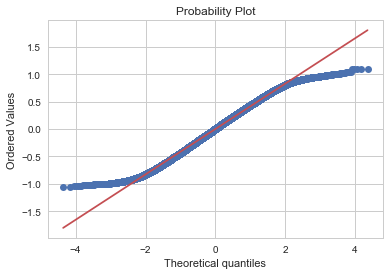

Chi^2       : 2447.460
P-value     :  0.000


In [141]:
sp.stats.probplot(result_2.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_2.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

# 제출을 위한 test파일 준비

### test file preprocessing

In [151]:
test = pd.read_csv('../../data/basic/test.csv')
print(test.shape)
test.head()

(526917, 3)


,date,store_nbr,item_nbr
0,2013-04-01,2,1
1,2013-04-01,2,2
2,2013-04-01,2,3
3,2013-04-01,2,4
4,2013-04-01,2,5


In [152]:
key = pd.read_csv('../../data/basic/key.csv')
weather = pd.read_csv('../../data/weather_v8_with_holiday.csv')

In [153]:
test = pd.merge(test, key)

In [154]:
test = pd.merge(test, weather)

In [155]:
test.columns

Index(['date', 'store_nbr', 'item_nbr', 'station_nbr', 'Unnamed: 0', 'tmax',
       'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'codesum', 'codesum_YN', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'codesum_2', 'year', 'monthday', 'days', 'dayofweek', 'is_holiday'],
      dtype='object')

In [156]:
test = pd.DataFrame(test, columns=['date','dayofweek', 'is_holiday', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax',
       'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'codesum', 'codesum_YN', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       ])

In [157]:
test.head()

,date,dayofweek,is_holiday,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,...,sunset,codesum,codesum_YN,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2013-04-01,Mon,workday,2,1,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0
1,2013-04-01,Mon,workday,2,2,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0
2,2013-04-01,Mon,workday,2,3,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0
3,2013-04-01,Mon,workday,2,4,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0
4,2013-04-01,Mon,workday,2,5,14,71.0,42.0,57.0,1.0,...,1131.0,RA,1,0.0,0.51,28.68,30.05,9.3,4.0,11.0


In [158]:
def is_holiday(holiday):
    if holiday == 'holiday':
        return 1
    elif holiday == 'holiday_work':
        return 1
    elif holiday == "workday":
        return 0

In [159]:
test['is_holiday'] = test['is_holiday'].apply(is_holiday)

In [160]:
test['year'] = test['date'].apply(make_year)
test['month'] = test['date'].apply(make_month)
test['day'] = test['date'].apply(make_day)
test['dayofweek'] = test['dayofweek'].apply(dayofweek_num)

In [161]:
test_sample = test.drop(columns=['date', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb',
       'sunrise', 'sunset','depart',  'codesum', 'codesum_YN', 'snowfall',
       'stnpressure', 'sealevel','resultdir', 'avgspeed',
       'station_nbr', 'heat', 'cool', 'preciptotal', 'is_holiday', 'resultspeed'])

In [162]:
test_sample.head()

,dayofweek,store_nbr,item_nbr,year,month,day
0,1,2,1,2013,4,1
1,1,2,2,2013,4,1
2,1,2,3,2013,4,1
3,1,2,4,2013,4,1
4,1,2,5,2013,4,1


In [163]:
test_X_df = pd.DataFrame(columns=['item_nbr', 'store_nbr','dayofweek', 'year', 'month', 'day'])

for nbr in range(1, 45+1):
    store_nbr = df_test[df_test['store_nbr'].isin([nbr])]
    sold_item_list = list(store_nbr['item_nbr'].unique())
    sold_item_list

    test_store_nbr = test_sample[test_sample['store_nbr'].isin([nbr])]
    to_test_df = test_store_nbr[test_store_nbr['item_nbr'].isin(sold_item_list)]

    test_X_df = pd.concat([test_X_df, to_test_df], axis = 0)
    
test_X_df.shape

(26168, 6)

In [164]:
test_X_df.head()

,day,dayofweek,item_nbr,month,store_nbr,year
484301,4,2,9,6,1,2013
484320,4,2,28,6,1,2013
484332,4,2,40,6,1,2013
484339,4,2,47,6,1,2013
484343,4,2,51,6,1,2013


In [165]:
test_X_df['store_nbr'] = test_X_df['store_nbr'].astype(int)
test_X_df['item_nbr'] = test_X_df['item_nbr'].astype(int)
test_X_df['year'] = test_X_df['year'].astype(int)
test_X_df['month'] = test_X_df['month'].astype(int)
test_X_df['day'] = test_X_df['day'].astype(int)
test_X_df['dayofweek'] = test_X_df['dayofweek'].astype(object)

### Predict

statsmodel로 model_2구현

In [166]:
test_result = result_2.predict(test_X_df)

In [167]:
test_result

484301    3.297408
484320    1.486430
484332    0.329769
484339    1.843145
484343    0.224505
484381    0.412410
484385    0.726461
484391    0.636102
484412    3.256086
484431    1.445108
484443    0.288447
484450    1.801823
484454    0.183184
484492    0.371088
484496    0.685139
484502    0.594780
484523    3.232331
484542    1.421354
484554    0.264693
484561    1.778069
484565    0.159429
484603    0.347333
484607    0.661385
484613    0.571026
484634    3.339482
484653    1.528504
484665    0.371843
484672    1.885219
484676    0.266580
484714    0.454484
            ...   
513156    0.274742
513161    2.549944
513174    0.450428
513178    1.217166
513186    0.023026
513202   -0.062106
513378    0.250988
513383    2.526190
513396    0.426674
513400    1.193412
513408   -0.000728
513424   -0.085861
513600    0.358138
513605    2.633340
513618    0.533824
513622    1.300562
513630    0.106422
513646    0.021289
513822    0.539955
513827    2.815157
513840    0.715642
513844    1.

### create submission file

In [168]:
result = pd.concat([test, test_result], axis=1)

In [169]:
print(result.shape)
result.head()

(526917, 29)


,date,dayofweek,is_holiday,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,0
0,2013-04-01,1,0,2,1,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,NaN
1,2013-04-01,1,0,2,2,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,NaN
2,2013-04-01,1,0,2,3,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,NaN
3,2013-04-01,1,0,2,4,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,NaN
4,2013-04-01,1,0,2,5,14,71.0,42.0,57.0,1.0,...,0.51,28.68,30.05,9.3,4.0,11.0,2013,4,1,4.087848


In [170]:
result['units'] = result[0]

In [171]:
def itiszero(units):
    if units > 0:
        return units
    else:
        return 0

In [172]:
result['units'] = result['units'].apply(itiszero)

In [173]:
result['units'] = result['units'].astype(int)

In [174]:
result = pd.DataFrame(data=result, columns=['store_nbr', 'item_nbr', 'date', 'units'])

In [175]:
for col in result[['store_nbr', 'item_nbr']]:
    result[col] = result[col].astype(int)

In [176]:
result['id'] = result['store_nbr'].astype(str)+'_'+result['item_nbr'].astype(str)+'_'+result['date'].astype(str)

In [177]:
for_submission = result.loc[:,['id','units']]

In [178]:
for_submission.head()

,id,units
0,2_1_2013-04-01,0
1,2_2_2013-04-01,0
2,2_3_2013-04-01,0
3,2_4_2013-04-01,0
4,2_5_2013-04-01,4


In [179]:
for_submission.to_csv('submission_sample9.csv', index=False)

1차 : Ridge 정규화 --> 0.35

2차 : 정규화 안 함 --> 0.33

3차 : 정규화 안 함 , 아웃라이어 제거 한번 더 --> 0.33

# 이번 시도의 결론, 

- 정규화 : 정규화를 했을 때 제출 점수가 더 낮아졌다.
- Fox Outlier Recommendation : 이 데이터셋에서는 성능 개선에 도움이 되지 않는다.
- 다음 시도에서는 outlier에만 집중할 예정